#### **Name**: Prasad GVS
#### **SDS Profile Link**: https://community.superdatascience.com/u/d95a79a9

### **Project Brief:**
The technology sector is one of the most dynamic and rapidly evolving industries. This project aims to analyze the leading technology companies globally by leveraging a dataset containing their rankings, market capitalization, stock tickers, country of operation, and the sector and industry they belong to. The goal is to uncover insights into the market dynamics of top tech companies, identify trends in market capitalization across regions, and understand the competitive landscape within various sectors and industries. This analysis will provide a comprehensive overview of the global tech industry, highlighting major players and trends that could inform business decisions, investment strategies, and market positioning.

#### Project Objectives
**Analyze Market Capitalization Trends:** Understand the distribution of market cap among the top tech companies, identifying companies with the largest and smallest market caps, and examining trends in the dataset.

**Regional Insights:** Investigate how tech companies' market caps and rankings vary across different countries and regions, and identify which regions dominate the global tech landscape.

**Sector and Industry Breakdown:** Examine the various sectors and industries within the tech field, identifying key players and emerging competitors in each industry (software, hardware, telecommunications, etc.).

**Competitive Positioning:** Assess how companies rank against their peers within the same sector and industry, providing insights into competitive strengths and weaknesses.

**Provide Strategic Recommendations (optional):** Based on the analysis, offer data-driven recommendations on potential opportunities for growth, investment, or expansion within the tech sector.

#### Business Questions to Answer:
1. Which companies hold the largest market share in the global tech industry?
2. How does market capitalization vary across countries or regions?
3. What are the leading sectors and industries within the tech space?
4. Which companies have shown consistent growth in market capitalization over time?
5. What emerging tech companies are rising in rankings?

#### Project Deliverables
1. **Data Exploration Report:** Initial findings on the distribution of rankings, market caps, and company performance across countries, sectors, and industries.
2. **Regional Market Analysis:** Detailed analysis of how tech companies are distributed geographically, highlighting regions with the largest market caps and the most competitive landscapes.
3. **Sector and Industry Insights:** Breakdown of leading companies by sector and industry, identifying key players, trends, and emerging competitors.
4. **Competitive Analysis Report:** Comparative report showing company rankings within specific industries, analyzing how different companies perform against their peers.
5. **Strategic Recommendations:** Actionable insights and recommendations for businesses on areas of growth, investment, or strategic expansion.
6. **Dashboard (Optional):** Interactive visualization that allows users to explore market cap, ranking, and other key metrics across companies, regions, and sectors.

### **Import the libraries**

In [365]:
import pandas as pd
#pd.set_option('display.precision', 30)
# Use pandas' display options to limit float precision in display
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True,palette="rainbow")

from skimpy import skim

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# import Label Encoder to encode the Country & Industry attributes
from sklearn.preprocessing import LabelEncoder

### **Import the dataset**

In [144]:
df = pd.read_csv('../../data/tech-companies.csv')

#### **Initial analysis of dataset**

In [145]:
df.head()

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors


In [146]:
df.shape

(1000, 7)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [148]:
df.nunique()

Ranking       1000
Company       1000
Market Cap     684
Stock          996
Country         38
Sector           1
Industry        12
dtype: int64

In [149]:
df.describe()

,Ranking
count,1000.000000000000000000000000000000
mean,500.500000000000000000000000000000
std,288.819436095749381365749286487699
min,1.000000000000000000000000000000
25%,250.750000000000000000000000000000
50%,500.500000000000000000000000000000
75%,750.250000000000000000000000000000
max,1000.000000000000000000000000000000


In [150]:
df.describe(include='object')

,Company,Market Cap,Stock,Country,Sector,Industry
count,1000,1000,1000,1000,1000,1000
unique,1000,684,996,38,1,12
top,Apple Inc.,$1.16 B,2382,United States,Technology,Software—Application
freq,1,9,2,317,1000,198


##### <font color='blue'>**From the initial analysis: attibute**</font>
##### <font color='blue'>**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. There are no missing values.**</font>
##### <font color='blue'>**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. Stock attribute is a key column in the dataset where there should not be any duplicates; but there are only 996 unique values out of 1000 records. Need further duplicate analysis on this attribute.**</font>
##### <font color='blue'>**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Market Cap attribute is in String/Object database needs to convert to float.**</font>
##### <font color='blue'>**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Perform encoding for categorical columns (Country & Industry attributes).**</font>

In [151]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0   ┃ p25     ┃ p50     ┃ p75     ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Ranking         │    0 │      0 │   500.5 │   288.8 │    1 │   250.8 │   500.5 │   750.2 │  1000 │ ▇▇▇▇▇▇  │  │
│ └─────────────────┴──────┴────────┴─────────┴─────────┴──────┴─────────┴─────────┴─────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Company                   │       0 │          0 │                          3.3 │                     3265 │  │
│ │ Market Cap                │       0 │          0 │                            2 │                     2000 │  │
│ │ Stock                     │       0 │          0 │                            1 │                     1000 │  │
│ │ Country                   │       0 │          0 │                          1.4 │                     1362 │  │
│ │ Sector                    │       0 │          0 │                            1 │                     1000 │  │
│ │ Industry                  │       0 │          0 │                          1.9 │                     1933 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### Distribution of Data

### **EDA**

#### **Handling Missing data**

In [154]:
df.isna().sum()

Ranking       0
Company       0
Market Cap    0
Stock         0
Country       0
Sector        0
Industry      0
dtype: int64

##### <font color='blue'>**There is no missing data in the dataset**</font>

#### **Analyzing duplicate data**

In [155]:
df.duplicated().value_counts()

False    1000
Name: count, dtype: int64

##### <font color='blue'>**No duplicate rows in the dataset**</font>

In [156]:
df['Stock'].duplicated().value_counts()

Stock
False    996
True       4
Name: count, dtype: int64

In [157]:
df[df['Stock'].duplicated(keep=False)].sort_values('Stock')

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
55,56,Hon Hai Precision Industry Co. Ltd,$47.43 B,2317,Taiwan,Technology,Electronic Components
978,979,Systena Corp,$850.0 M,2317,Japan,Technology,Information Technology Services
86,87,"Quanta Computer, Inc.",$27.51 B,2382,Taiwan,Technology,Computer Hardware
205,206,Sunny Optical Technology Group Co Ltd,$9.06 B,2382,China,Technology,Electronic Components
354,355,Powerchip Semiconductor Manufacturing Corp,$4.47 B,6770,Taiwan,Technology,Semiconductors
627,628,Alps Alpine Co Ltd,$1.83 B,6770,Japan,Technology,Consumer Electronics
459,460,"Sprout Social, Inc.",$3.13 B,SPT,United States,Technology,Software—Application
941,942,Spirent Communications plc,$908.3 M,SPT,United Kingdom,Technology,Software—Infrastructure


##### <font color='red'>**Even though there are no duplicate records in dataset; but for 4 Stock (ticker symbol) we have duplicate records with different Market cap for different Country.**</font>

##### <font color='blue'>**Based on the observation we need to consider Stock & Country as combined unique column.**</font>

#### **Convert curreny data**

In [164]:
def convert_to_billions(marketcap):
    marketcap = marketcap.replace('$', '')  # Remove the dollar sign if present
    if 'M' in marketcap:
        return round(float(marketcap.replace('M', '')) / 1_000, 5)  # Convert millions to billions
    elif 'B' in marketcap:
        return round(float(marketcap.replace('B', '')), 5)  # Already in billions
    elif 'T' in marketcap:
        return round(float(marketcap.replace('T', '')) * 1_000, 5)  # Convert trillions to billions
    else:
        return round(float(marketcap), 5)  # No conversion if no suffix


In [194]:
df['MarketCap_in_Billions'] = df.apply(lambda x: round(convert_to_billions(x['Market Cap']),3), axis=1)
df['MarketCap_in_Billions']

0      2866.000000000000000000000000000000
1      2755.000000000000000000000000000000
2      1186.000000000000000000000000000000
3       495.949999999999988631316227838397
4       487.639999999999986357579473406076
                      ...                 
995       0.824999999999999955591079014994
996       0.819999999999999951150186916493
997       0.818999999999999950262008496793
998       0.815999999999999947597473237693
999       0.811000000000000054178883601708
Name: MarketCap_in_Billions, Length: 1000, dtype: float64

In [166]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Ranking                 │   0 │     0 │  500.5 │  288.8 │      1 │  250.8 │  500.5 │ 750.2 │ 1000 │ ▇▇▇▇▇▇ │  │
│ │ MarketCap_in_Billions   │   0 │     0 │  18.76 │  135.7 │  0.811 │   1.35 │  2.735 │ 7.033 │ 2866 │   ▇    │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Company                   │       0 │          0 │                          3.3 │                     3265 │  │
│ │ Market Cap                │       0 │          0 │                            2 │                     2000 │  │
│ │ Stock                     │       0 │          0 │                            1 │                     1000 │  │
│ │ Country                   │       0 │          0 │                          1.4 │                     1362 │  │
│ │ Sector                    │       0 │          0 │                            1 │                     1000 │  │
│ │ Industry                  │       0 │          0 │                          1.9 │                     1933 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

#### **Encoding categorical data**

In [270]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Country' column
df['Country_encoded'] = label_encoder.fit_transform(df['Country']) + 1

# Apply label encoding to the 'Industry' column
df['Industry_encoded'] = label_encoder.fit_transform(df['Industry']) + 1

In [271]:
df.sample(10).T

,980,12,138,848,328,566,739,837,9,901
Ranking,981,13,139,849,329,567,740,838,10,902
Company,"Tri Chemical Laboratories, Inc.","Cisco Systems, Inc.",ZTE Corp,Fujian Start Group Co.Ltd,"ExlService Holdings, Inc.",Jamf Holding Corp.,"Sineng Electric Co.,Ltd.",Taiwan Union Technology Corp,"salesforce.com, inc.","A10 Networks, Inc."
Market Cap,$848.0 M,$205.21 B,$15.46 B,$1.06 B,$4.95 B,$2.19 B,$1.39 B,$1.09 B,$243.78 B,$957.9 M
Stock,4369,CSCO,000063,600734,EXLS,JAMF,300827,6274,CRM,ATEN
Country,Japan,United States,China,China,United States,United States,China,Taiwan,United States,United States
Sector,Technology,Technology,Technology,Technology,Technology,Technology,Technology,Technology,Technology,Technology
Industry,Semiconductors,Communication Equipment,Communication Equipment,Computer Hardware,Information Technology Services,Software—Application,Electronic Components,Electronic Components,Software—Application,Software—Infrastructure
MarketCap_in_Billions,0.847999999999999976019182668097,205.210000000000007958078640513122,15.46000000000000085265128291212,1.060000000000000053290705182008,4.950000000000000177635683940025,2.189999999999999946709294817992,1.389999999999999902300373832986,1.090000000000000079936057773011,243.78000000000000113686837721616,0.957999999999999962696506372595
Country_encoded,19,38,8,8,38,38,8,33,38,38
Industry_encoded,9,1,1,2,6,10,4,4,10,11


In [272]:
print(min(df['Industry_encoded']) , max(df['Industry_encoded']))

1 12


In [273]:
print(min(df['Country_encoded']) , max(df['Country_encoded']))

1 38


#### **Analysis using Visualization**

<Axes: xlabel='Country'>

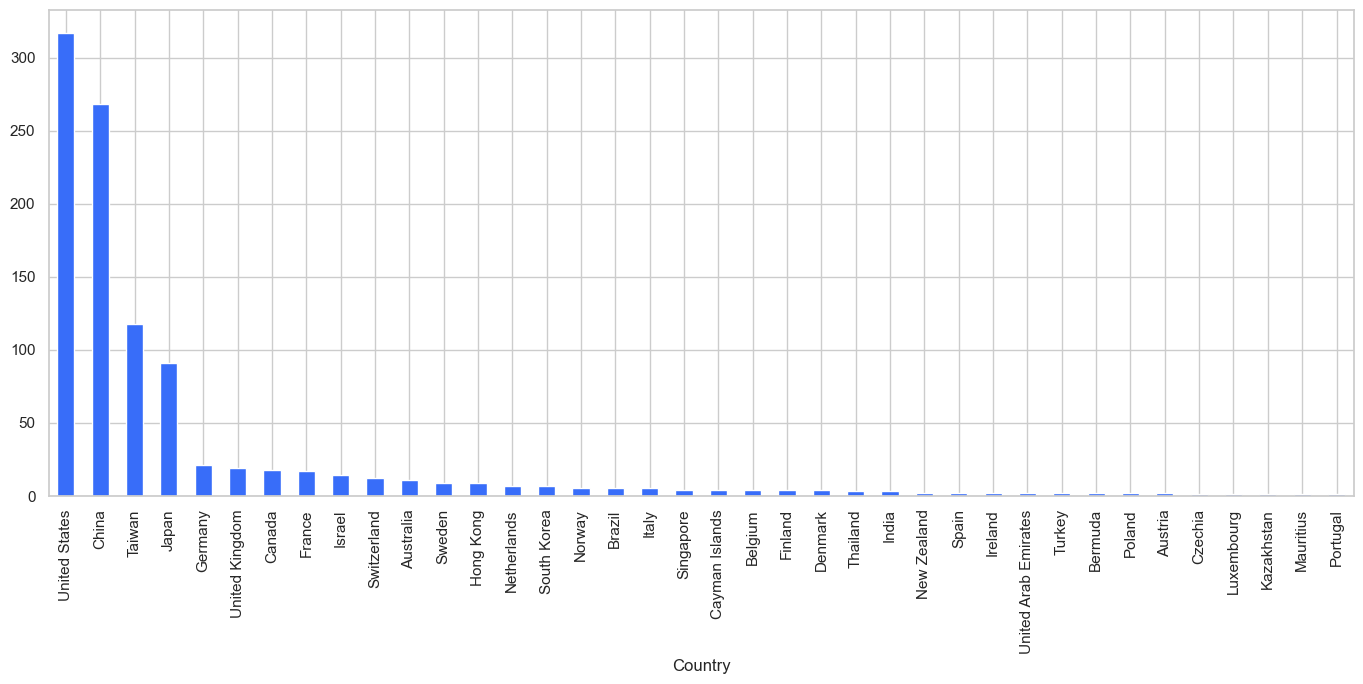

In [296]:
# Count the occurrences of each country
country_counts = df['Country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 6))
country_counts.plot(kind='bar')

<Axes: xlabel='Industry'>

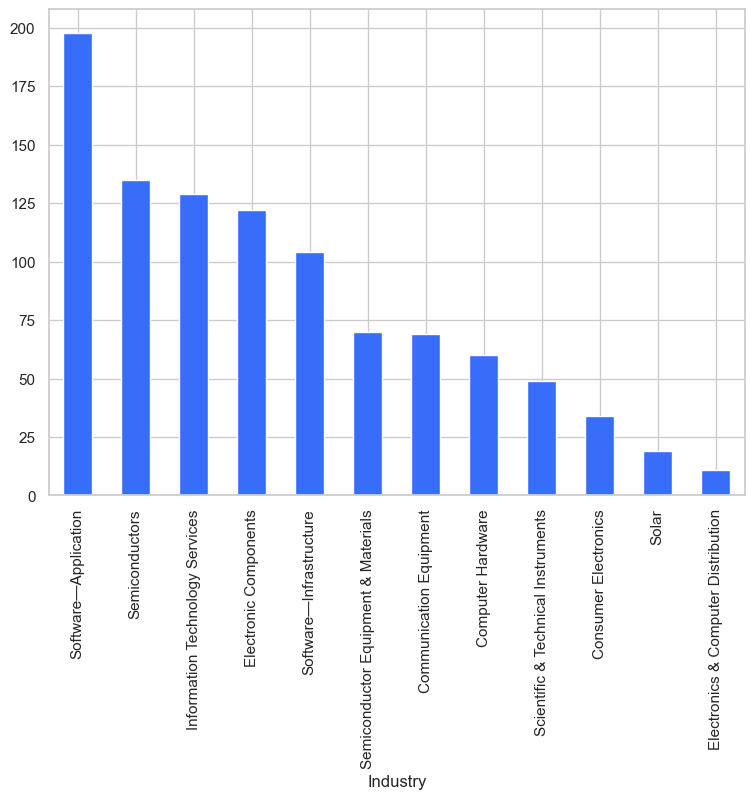

In [291]:
# Count the occurrences of each Industry
industry_counts = df['Industry'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
industry_counts.plot(kind='bar')

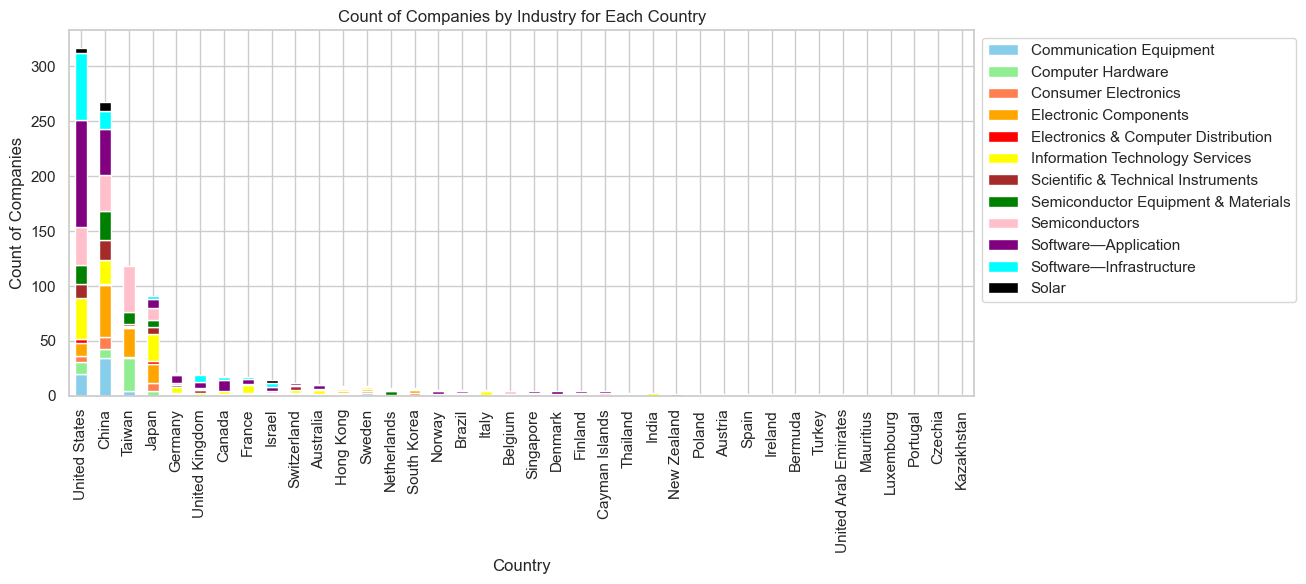

In [254]:
#Group by 'Country' and 'Industry' and count occurrences
grouped_data = df.groupby(['Country', 'Industry']).size().unstack(fill_value=0)
# Add a column for the total count of companies in each country
grouped_data['Total'] = grouped_data.sum(axis=1)
# Sort the DataFrame by the 'Total' column in descending order
grouped_data = grouped_data.sort_values(by='Total', ascending=False)
# Remove the 'Total' column (as it was only used for sorting)
grouped_data = grouped_data.drop(columns='Total')

# Plot stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightgreen', 'coral', 'orange', 'red', 'yellow', 'brown', 'green', 'pink', 'purple', 'cyan','black'])

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Count of Companies')
plt.title('Count of Companies by Industry for Each Country')

# Show the plot
plt.tight_layout()
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

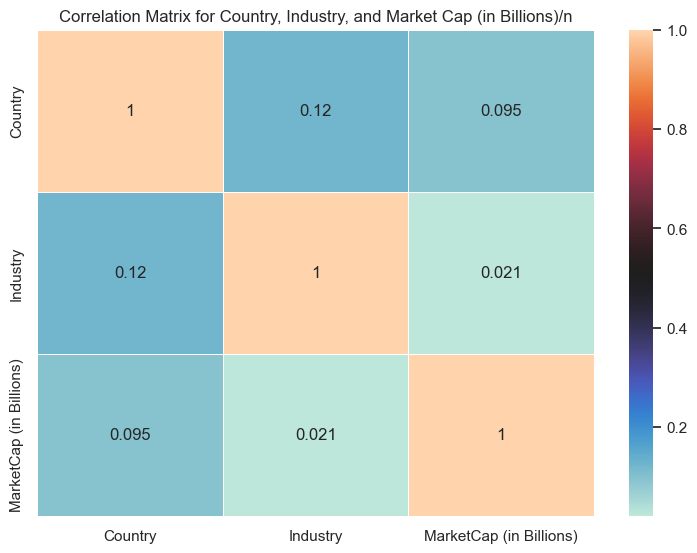

In [280]:
# Select the numeric columns for correlation (encoded 'Country', 'Industry' & 'Market Cap in Billions')
df_corr = df[['Country_encoded', 'Industry_encoded', 'MarketCap_in_Billions']]

df_corr = df_corr.rename(columns={
    'Country_encoded': 'Country',
    'Industry_encoded': 'Industry',
    'MarketCap_in_Billions': 'MarketCap (in Billions)'
})

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='icefire', linewidths=0.5)

# Add labels and title
plt.title('Correlation Matrix for Country, Industry, and Market Cap (in Billions)')
plt.show()

Text(0.5, 1.0, 'Ranking with Market Cap')

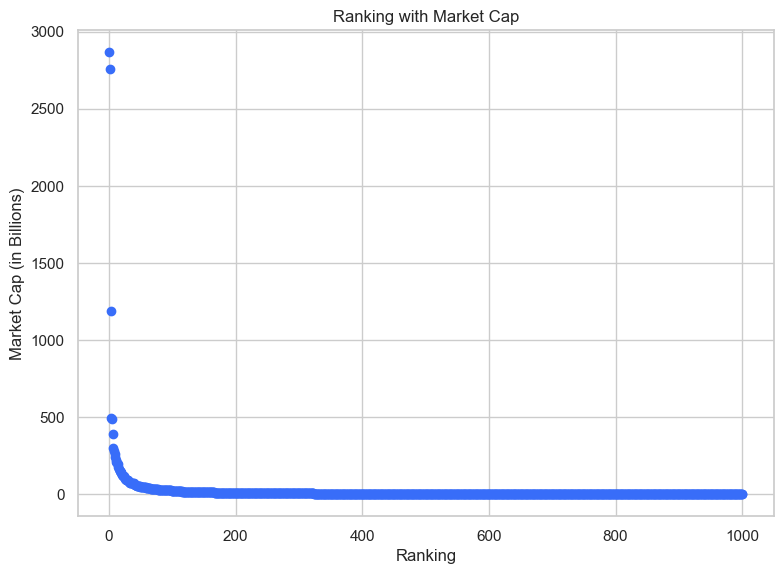

In [290]:
# Identifying the spread of Market Cap
x = df['Ranking']
y = df['MarketCap_in_Billions']

plt.figure(figsize=(8, 6))
plt.scatter(x, y)

plt.xlabel('Ranking')
plt.ylabel('Market Cap (in Billions)')
plt.title('Ranking with Market Cap')

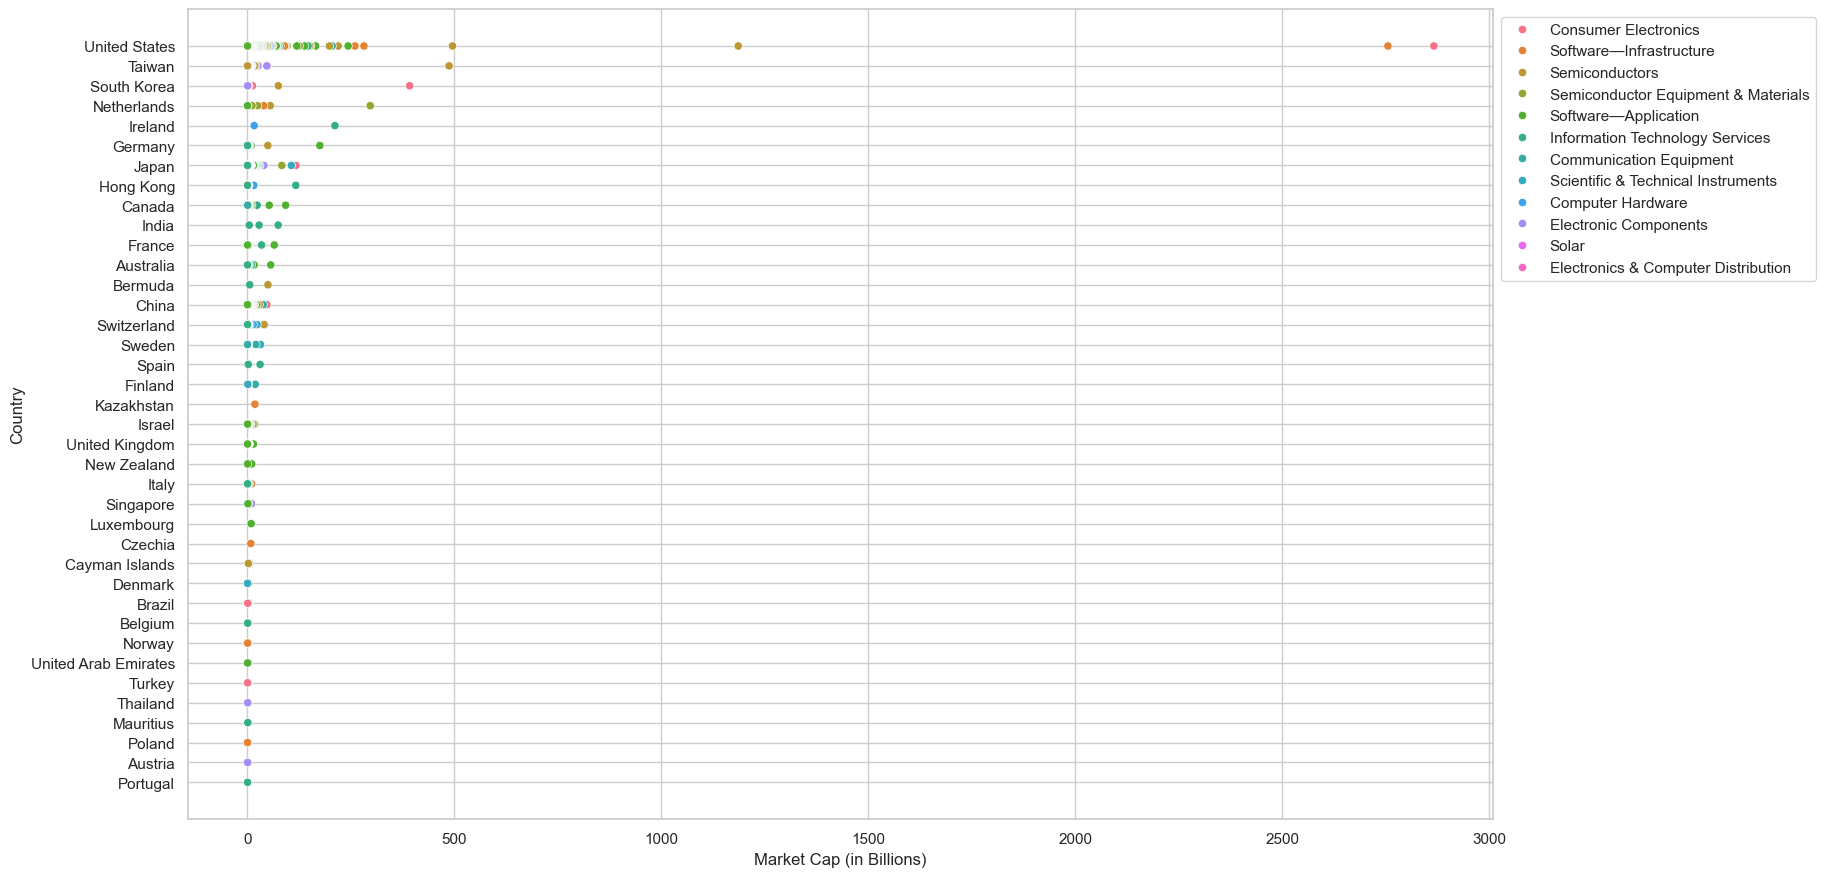

In [288]:
# Identifying the spread of Market Cap based on Country
plt.figure(figsize=(15, 10))
sns.scatterplot( x="MarketCap_in_Billions", y='Country', data=df,
                hue='Industry') # size='MarketCap_in_Billions'

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.xlabel('Market Cap (in Billions)')
plt.ylabel('Country')
plt.show()

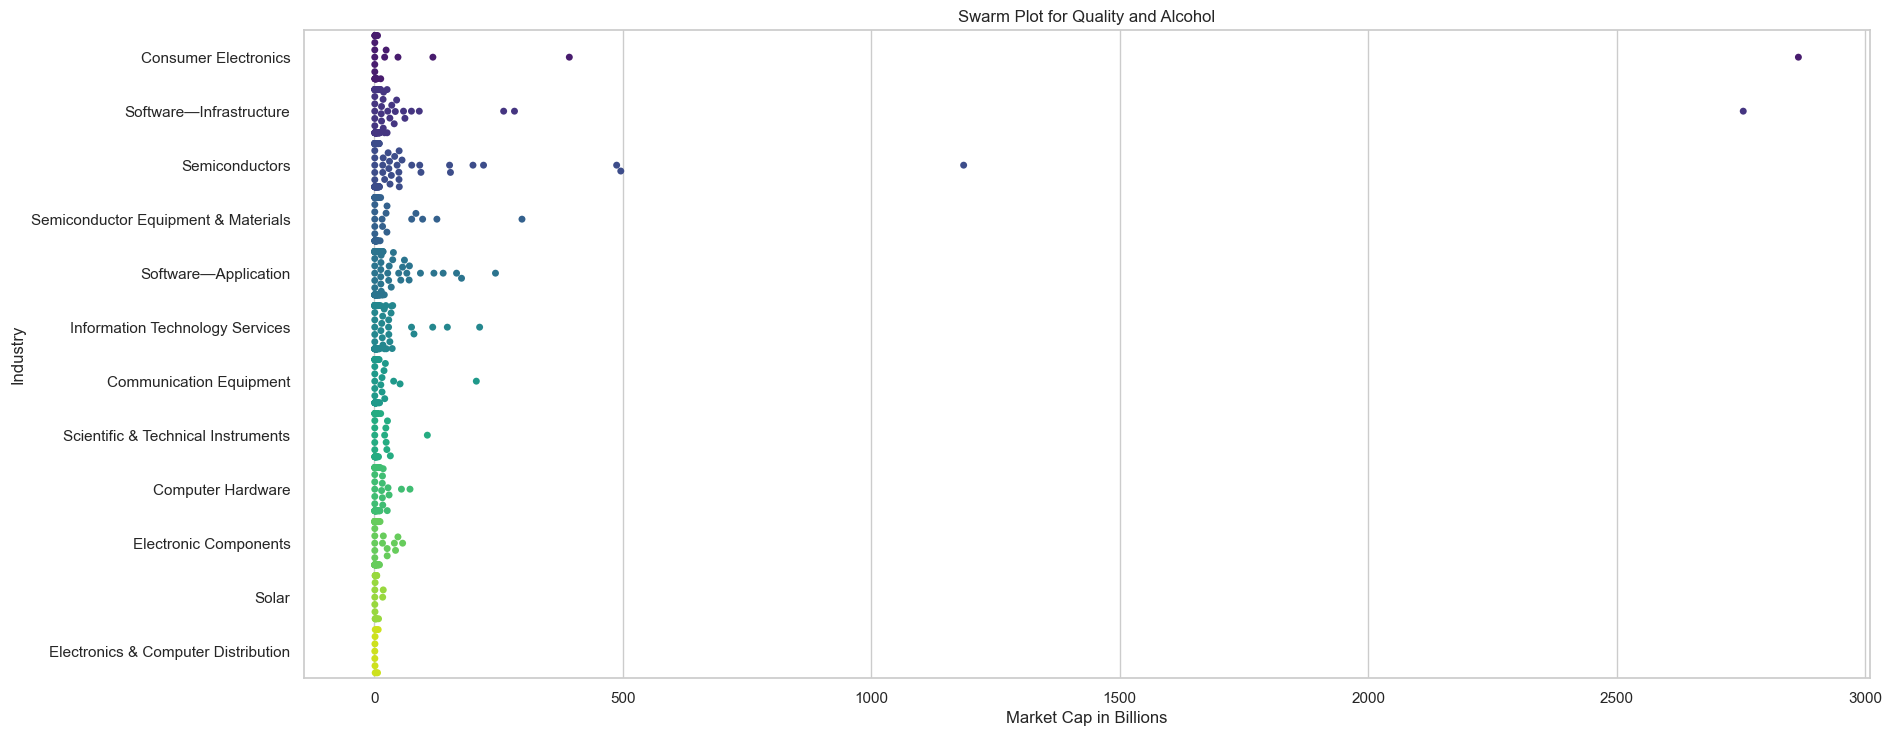

In [287]:
# Identifying the spread of Market Cap based on Industry
plt.figure(figsize=(18, 8))
sns.swarmplot(x="MarketCap_in_Billions", y="Industry", data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Market Cap (in Billions)')
plt.ylabel('Industry')
plt.show()

### <font color='brown'>**Load Historical Market CAP data for Top 116 United States Companies**</font>
### Merge Historical Market Cap with Top 1000 Comapnies and perform analysis on historical data for the Top 116 companies

In [449]:
df_hist = pd.read_csv('../../data/MarketCap_History_Top-116_Companies.csv')

In [450]:
df_hist['marketcap_in_billions'] = round(df_hist['marketCap'] / 1_000_000_000, 2)

In [451]:
df_merge = pd.merge(df_hist, df, left_on='symbol', right_on='Stock', how='inner')

In [452]:
df_merge.head()

,symbol,date,marketCap,marketcap_in_billions,Ranking,Company,Market Cap,Stock,Country,Sector,Industry,MarketCap_in_Billions,Country_encoded,Industry_encoded
0,AZPN,2024-08-30,14822935120,14.82,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27,38,10
1,AZPN,2024-08-29,14528552920,14.53,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27,38,10
2,AZPN,2024-08-28,13894839840,13.89,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27,38,10
3,AZPN,2024-08-27,13570702880,13.57,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27,38,10
4,AZPN,2024-08-26,13539048880,13.54,153,"Aspen Technology, Inc.",$13.27 B,AZPN,United States,Technology,Software—Application,13.27,38,10


In [453]:
df_merge = df_merge.drop(columns=['symbol','Ranking','marketCap','Market Cap','Sector','MarketCap_in_Billions','Country','Country_encoded'])

In [454]:
df_merge['date'] = pd.to_datetime(df_merge['date'])

#### Join Nasdaq Daily Index (Historical Data)

In [455]:
df_nasdaq = pd.read_csv('../../data/nasdaq_historical_data.csv')

In [456]:
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,12958.52,12958.72,12543.24,12698.45,12698.45,6636170000
1,2021-01-05,12665.65,12828.27,12665.65,12818.96,12818.96,6971860000
2,2021-01-06,12666.15,12909.63,12649.99,12740.79,12740.79,7689880000
3,2021-01-07,12867.34,13090.91,12867.34,13067.48,13067.48,6841480000
4,2021-01-08,13160.22,13208.09,13036.55,13201.98,13201.98,7289390000


In [457]:
df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       921 non-null    object 
 1   Open       921 non-null    float64
 2   High       921 non-null    float64
 3   Low        921 non-null    float64
 4   Close      921 non-null    float64
 5   Adj Close  921 non-null    float64
 6   Volume     921 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 50.5+ KB


In [458]:
df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date'])

In [459]:
df_nasdaq['Index_Difference'] = df_nasdaq['Close'] - df_nasdaq['Open']

In [460]:
df_nasdaq['Index_Difference_in_Percent'] = round(((df_nasdaq['Close'] - df_nasdaq['Open']) / df_nasdaq['Open']) * 100, 2)

In [461]:
df_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Index_Difference,Index_Difference_in_Percent
0,2021-01-04,12958.52,12958.72,12543.24,12698.45,12698.45,6636170000,-260.07,-2.01
1,2021-01-05,12665.65,12828.27,12665.65,12818.96,12818.96,6971860000,153.31,1.21
2,2021-01-06,12666.15,12909.63,12649.99,12740.79,12740.79,7689880000,74.64,0.59
3,2021-01-07,12867.34,13090.91,12867.34,13067.48,13067.48,6841480000,200.14,1.56
4,2021-01-08,13160.22,13208.09,13036.55,13201.98,13201.98,7289390000,41.76,0.32


In [462]:
df_merge = pd.merge(df_merge, df_nasdaq, left_on='date', right_on='Date', how='inner')

In [463]:
df_merge = df_merge.drop(columns=['Date','Open','High','Low','Adj Close','Volume'])

In [464]:
df_merge.nunique()

date                             921
marketcap_in_billions          20799
Company                          116
Stock                            116
Industry                          11
Industry_encoded                  11
Close                            921
Index_Difference                 914
Index_Difference_in_Percent      393
dtype: int64

In [465]:
df_merge = df_merge.rename(columns={"Close": "NASDAQ_Closing_Index"})

In [466]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105376 entries, 0 to 105375
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         105376 non-null  datetime64[ns]
 1   marketcap_in_billions        105376 non-null  float64       
 2   Company                      105376 non-null  object        
 3   Stock                        105376 non-null  object        
 4   Industry                     105376 non-null  object        
 5   Industry_encoded             105376 non-null  int64         
 6   NASDAQ_Closing_Index         105376 non-null  float64       
 7   Index_Difference             105376 non-null  float64       
 8   Index_Difference_in_Percent  105376 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 7.2+ MB


#### Date Component Extraction

In [467]:
df_merge['year'] = df_merge['date'].dt.year
df_merge['month'] = df_merge['date'].dt.month
df_merge['day'] = df_merge['date'].dt.day
df_merge['day_of_week'] = df_merge['date'].dt.day_name()
df_merge['day_of_week_num'] = df_merge['date'].dt.dayofweek ## (0 = Monday, 6 = Sunday)
df_merge['week_number'] = df_merge['date'].dt.isocalendar().week
df_merge['quarter'] = df_merge['date'].dt.quarter

In [468]:
df_merge.head()

,date,marketcap_in_billions,Company,Stock,Industry,Industry_encoded,NASDAQ_Closing_Index,Index_Difference,Index_Difference_in_Percent,year,month,day,day_of_week,day_of_week_num,week_number,quarter
0,2024-08-30,14.82,"Aspen Technology, Inc.",AZPN,Software—Application,10,17713.62,63.13,0.36,2024,8,30,Friday,4,35,3
1,2024-08-29,14.53,"Aspen Technology, Inc.",AZPN,Software—Application,10,17516.43,-94.14,-0.53,2024,8,29,Thursday,3,35,3
2,2024-08-28,13.89,"Aspen Technology, Inc.",AZPN,Software—Application,10,17556.03,-182.77,-1.03,2024,8,28,Wednesday,2,35,3
3,2024-08-27,13.57,"Aspen Technology, Inc.",AZPN,Software—Application,10,17754.82,99.30,0.56,2024,8,27,Tuesday,1,35,3
4,2024-08-26,13.54,"Aspen Technology, Inc.",AZPN,Software—Application,10,17725.77,-142.08,-0.80,2024,8,26,Monday,0,35,3


In [469]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105376 entries, 0 to 105375
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   date                         105376 non-null  datetime64[ns]
 1   marketcap_in_billions        105376 non-null  float64       
 2   Company                      105376 non-null  object        
 3   Stock                        105376 non-null  object        
 4   Industry                     105376 non-null  object        
 5   Industry_encoded             105376 non-null  int64         
 6   NASDAQ_Closing_Index         105376 non-null  float64       
 7   Index_Difference             105376 non-null  float64       
 8   Index_Difference_in_Percent  105376 non-null  float64       
 9   year                         105376 non-null  int32         
 10  month                        105376 non-null  int32         
 11  day                       

In [470]:
skim(df_merge)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 105376 │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 4     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd    ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ marketcap_in_billions  │   0 │     0 │    95.23 │ 343.1 │   1.56 │  12.63 │ 22.75 │ 50.88 │  3590 │   ▇    │  │
│ │ Industry_encoded       │   0 │     0 │    8.243 │ 3.054 │      1 │      6 │    10 │    10 │    12 │ ▂▁▂▂▇▅ │  │
│ │ NASDAQ_Closing_Index   │   0 │     0 │    13780 │  1870 │  10210 │  12220 │ 13750 │ 15040 │ 18650 │ ▃▅▇▅▃▁ │  │
│ │ Index_Difference       │   0 │     0 │    1.205 │ 156.2 │ -498.2 │ -88.08 │  8.99 │ 106.3 │ 885.7 │  ▁▅▇▁  │  │
│ │ Index_Difference_in_Pe │   0 │     0 │  0.01818 │ 1.183 │  -3.92 │  -0.67 │  0.06 │  0.75 │  7.04 │  ▁▅▇▁  │  │
│ │ rcent                  │     │       │          │       │        │        │       │       │       │        │  │
│ │ year                   │   0 │     0 │     2022 │ 1.062 │   2021 │   2021 │  2022 │  2023 │  2024 │ ▇ ▇ ▇▅ │  │
│ │ month                  │   0 │     0 │    6.201 │ 3.344 │      1 │      3 │     6 │     9 │    12 │ ▇▇▇▇▆▆ │  │
│ │ day                    │   0 │     0 │     15.7 │ 8.768 │      1 │      8 │    16 │    23 │    31 │ ▇▇▇▇▇▇ │  │
│ │ day_of_week_num        │   0 │     0 │    2.036 │ 1.395 │      0 │      1 │     2 │     3 │     4 │ ▇▇ ▇▇▇ │  │
│ │ week_number            │   0 │     0 │    25.07 │ 14.57 │      1 │     13 │    24 │    37 │    52 │ ▇▇▇▇▆▆ │  │
│ │ quarter                │   0 │     0 │    2.404 │  1.09 │      1 │      1 │     2 │     3 │     4 │ ▇ ▇ ▇▆ │  │
│ └────────────────────────┴─────┴───────┴──────────┴───────┴────────┴────────┴───────┴───────┴───────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2021-01-04      │     2024-08-30      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━

In [476]:
df_merge.head()

,date,marketcap_in_billions,Company,Stock,Industry,Industry_encoded,NASDAQ_Closing_Index,Index_Difference,Index_Difference_in_Percent,year,month,day,day_of_week,day_of_week_num,week_number,quarter
0,2024-08-30,14.82,"Aspen Technology, Inc.",AZPN,Software—Application,10,17713.62,63.13,0.36,2024,8,30,Friday,4,35,3
1,2024-08-29,14.53,"Aspen Technology, Inc.",AZPN,Software—Application,10,17516.43,-94.14,-0.53,2024,8,29,Thursday,3,35,3
2,2024-08-28,13.89,"Aspen Technology, Inc.",AZPN,Software—Application,10,17556.03,-182.77,-1.03,2024,8,28,Wednesday,2,35,3
3,2024-08-27,13.57,"Aspen Technology, Inc.",AZPN,Software—Application,10,17754.82,99.30,0.56,2024,8,27,Tuesday,1,35,3
4,2024-08-26,13.54,"Aspen Technology, Inc.",AZPN,Software—Application,10,17725.77,-142.08,-0.80,2024,8,26,Monday,0,35,3


### Analyze historical data using Visualization

#### Build a plot to identify year over market cap trend on Industry

In [493]:
grouped_df_yr_ind = df_merge.groupby(['year', 'Industry'])['marketcap_in_billions'].mean().reset_index()

In [506]:
pivot_df_yr_ind = grouped_df_yr_ind.pivot(index='year', columns='Industry', values='marketcap_in_billions')
pivot_df_yr_ind

Industry,Communication Equipment,Computer Hardware,Consumer Electronics,Electronic Components,Information Technology Services,Scientific & Technical Instruments,Semiconductor Equipment & Materials,Semiconductors,Software—Application,Software—Infrastructure,Solar
year,,,,,,,,,,,
2021,56.00,21.05,2332.54,28.05,35.34,23.49,50.49,118.53,40.44,131.74,16.71
2022,50.74,20.90,2491.38,27.29,30.89,21.49,41.58,106.93,30.21,116.62,21.20
2023,51.69,24.31,2698.61,29.99,30.02,20.88,48.23,144.28,33.35,137.24,20.57
2024,52.46,44.78,2979.55,39.12,37.59,21.52,72.01,278.43,45.29,193.30,18.28


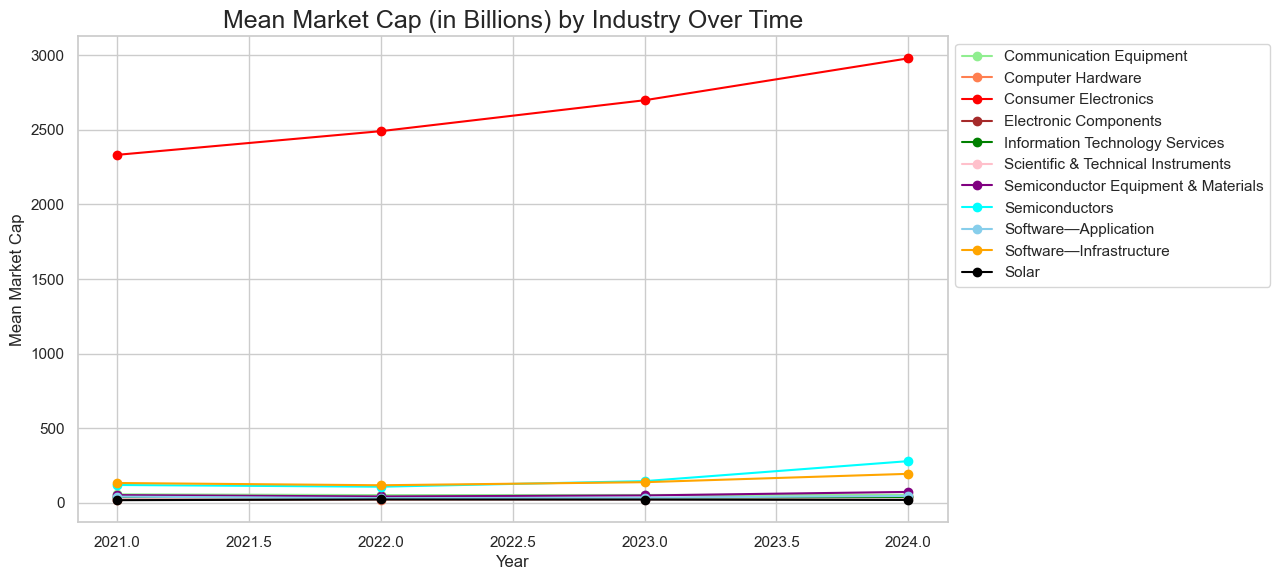

In [529]:
colors = {'Communication Equipment' : 'lightgreen',
'Computer Hardware' : 'coral',
'Consumer Electronics' : 'red',
'Electronic Components' : 'brown',
'Information Technology Services' : 'green',
'Scientific & Technical Instruments': 'pink',
'Semiconductor Equipment & Materials': 'purple',
'Semiconductors' : 'cyan',
'Software—Application' : 'skyblue',
'Software—Infrastructure' : 'orange',
'Solar': 'black'}

plt.figure(figsize=(10, 6))
for Industry in pivot_df_yr_ind.columns:
    plt.plot(pivot_df_yr_ind.index, pivot_df_yr_ind[Industry], marker='o', label=Industry, color=colors[Industry])

# Add titles and labels
plt.title('Mean Market Cap (in Billions) by Industry Over Time', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Market Cap', fontsize=12)
plt.legend(title='Industry')

plt.legend(bbox_to_anchor=(1, 1), loc=2)
# Show the plot
plt.grid(True)
plt.show()

### Business Questions to Answer

#### 1. Which companies hold the largest market share in the global tech industry?

In [522]:
grouped_df_yr_companies = df_merge.groupby(['year', 'Stock'])['marketcap_in_billions'].mean().reset_index()
grouped_df_yr_companies

,year,Stock,marketcap_in_billions
0,2021,AAPL,2332.54
1,2021,ADBE,267.34
2,2021,ADI,70.55
3,2021,ADSK,64.39
4,2021,AFRM,24.79
...,...,...,...
456,2024,WDC,21.67
457,2024,WEX,8.44
458,2024,ZBRA,15.30
459,2024,ZI,5.42


In [520]:
def get_top10_companies_per_year(gropeddf, n):
    return gropeddf.nlargest(n, 'marketcap_in_billions')

In [524]:
grouped_top10_yr_companies = grouped_df_yr_companies.groupby('year', group_keys=False).apply(get_top10_companies_per_year, 10).reset_index()
grouped_top10_yr_companies = grouped_top10_yr_companies.drop(columns='index')
grouped_top10_yr_companies

,year,Stock,marketcap_in_billions
0,2021,AAPL,2332.54
1,2021,MSFT,2074.78
2,2021,NVDA,487.11
3,2021,ADBE,267.34
4,2021,CRM,235.51
5,2021,ORCL,230.39
6,2021,INTC,226.69
7,2021,CSCO,224.36
8,2021,AVGO,203.31
9,2021,TXN,171.74


In [526]:
pivot_df_yr_companies = grouped_top10_yr_companies.pivot(index='year', columns='Stock', values='marketcap_in_billions')
pivot_df_yr_companies

Stock,AAPL,ADBE,AMD,AVGO,CRM,CSCO,INTC,MSFT,NVDA,ORCL,QCOM,TXN
year,,,,,,,,,,,,
2021,2332.54,267.34,NaN,203.31,235.51,224.36,226.69,2074.78,487.11,230.39,NaN,171.74
2022,2491.38,185.85,NaN,224.04,175.31,200.51,158.36,2008.72,462.86,203.31,156.41,NaN
2023,2698.61,212.39,164.95,330.58,198.86,206.73,NaN,2333.74,902.93,283.66,NaN,152.81
2024,2979.55,241.22,265.30,646.54,263.73,195.89,NaN,3104.04,2349.79,341.96,194.75,NaN


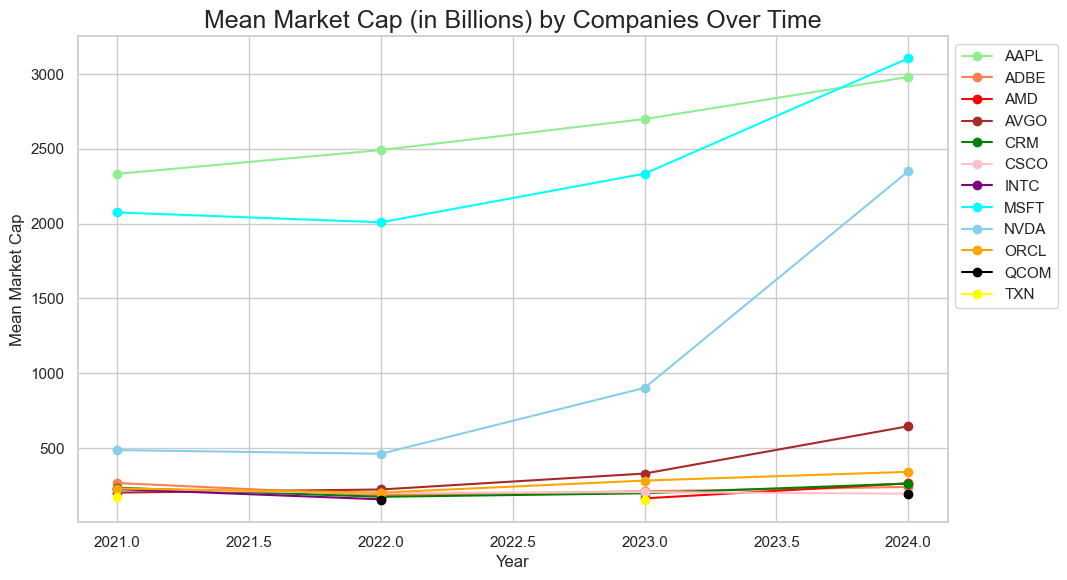

In [528]:
colors = {'AAPL' : 'lightgreen',
'ADBE' : 'coral',
'AMD' : 'red',
'AVGO' : 'brown',
'CRM' : 'green',
'CSCO': 'pink',
'INTC': 'purple',
'MSFT' : 'cyan',
'NVDA' : 'skyblue',
'ORCL' : 'orange',
'QCOM': 'black',
'TXN': 'yellow'}

plt.figure(figsize=(10, 6))
for Stock in pivot_df_yr_companies.columns:
    plt.plot(pivot_df_yr_companies.index, pivot_df_yr_companies[Stock], marker='o', label=Stock, color=colors[Stock])

# Add titles and labels
plt.title('Mean Market Cap (in Billions) by Companies Over Time', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Market Cap', fontsize=12)
plt.legend(title='Companies')

plt.legend(bbox_to_anchor=(1, 1), loc=2)
# Show the plot
plt.grid(True)
plt.show()